# Affairs dataset

---

This dataset, located in the `Affairs` folder, is a survey collecting data on the number of affairs people have had and other characteristics.

The columns are described:

    sex: a string with gender (male, female)
    age: age
    ym: number of years married
    child: children vs. not (yes, no)
    religious: how religious, from 1 (anti) to 5 (very)
    education: years of education
    occupation: occupation, from 1 to 7, according to hollingshead classification (lower = more "prestige")
    rate: self rating of mariage, from 1 (very unhappy) to 5 (very happy)
    nbaffairs: number of affairs in past year
    
The challenge with EDA in this dataset is primarily that so many of the variables are categorical or ordinal responses. Scatter plots are not very useful for visualization since the points simply overlap each other.

---
### Requirements

As a group you should:

1. Load and clean, if neccessary, the data with pandas.
2. Identify variables and subsets of the data your are interested in as a group.
2. Describe the data and investigate outliers for those variables.
3. Explore relationships between variables.
4. Visualize at least three variables of your choice with appropriate visualizations. They should be readable.
5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. For example, number of attendance in the stadium a team by opponent.
6. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.



In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
affairs = pd.read_csv('../../../../resource-datasets/affairs/affair.csv')

In [3]:
affairs.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,male,37.0,10.00,no,3,18,7,4,0
1,2,female,27.0,4.00,no,4,14,6,4,0
2,3,female,32.0,15.00,yes,1,12,1,4,0
3,4,male,57.0,15.00,yes,5,18,6,5,0
4,5,male,22.0,0.75,no,2,17,6,3,0


In [4]:
affairs.shape

(601, 10)

In [5]:
affairs.columns

Index([u'Unnamed: 0', u'sex', u'age', u'ym', u'child', u'religious',
       u'education', u'occupation', u'rate', u'nbaffairs'],
      dtype='object')

In [6]:
affairs.drop('Unnamed: 0', axis =1, inplace = True)

In [7]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [8]:
affairs.describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,1.455907
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,3.298758
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


In [9]:
affairs.pivot_table(affairs, index = 'sex')

,age,education,nbaffairs,occupation,rate,religious,ym
sex,,,,,,,
female,30.801587,15.257143,1.419048,3.384127,3.939683,3.107937,8.017070
male,34.344406,17.167832,1.496503,5.087413,3.923077,3.125874,8.354608


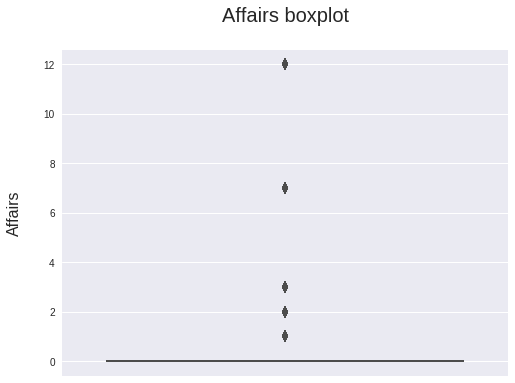

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(affairs['nbaffairs'], orient='v', fliersize = 8, linewidth = 1.5, notch=True, saturation=0.5,whis=1.5, ax=ax)

ax.set_ylabel('Affairs\n', fontsize=16)
ax.set_title('Affairs boxplot\n', fontsize=20)

plt.show()

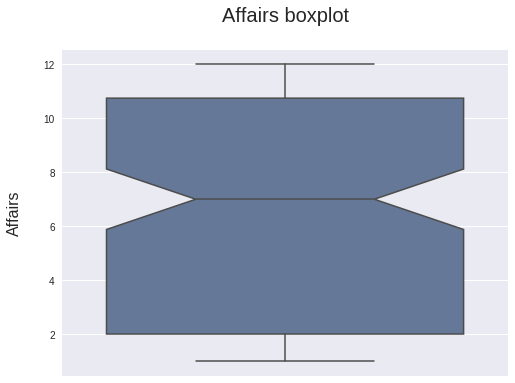

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(affairs.loc[affairs['nbaffairs'] > 0]['nbaffairs'], orient='v', fliersize = 8, linewidth = 1.5, notch=True, saturation=0.5,whis=1.5, ax=ax)

ax.set_ylabel('Affairs\n', fontsize=16)
ax.set_title('Affairs boxplot\n', fontsize=20)

plt.show()

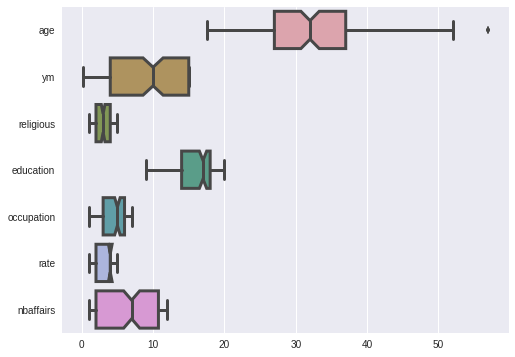

In [12]:
affairsfilter = affairs.loc[affairs['nbaffairs']>0]
fig = plt.figure(figsize = (8,6))
ax = fig.gca()

sns.boxplot(data = affairsfilter, orient = 'h', fliersize = 5, 
            linewidth=3, notch = True, saturation = 0.5)

plt.show()

In [13]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [18]:
affairsdrop = affairsfilter.drop(['sex','child'],axis=1)

In [19]:
affairsdrop

,age,ym,religious,education,occupation,rate,nbaffairs
451,27.0,1.500,3,18,4,4,3
452,27.0,4.000,3,17,1,5,3
453,37.0,15.000,5,18,6,2,7
454,32.0,10.000,3,17,5,2,12
455,22.0,0.125,4,16,5,5,1
456,22.0,1.500,2,14,1,5,1
457,37.0,15.000,4,14,5,2,12
458,22.0,1.500,2,14,3,4,7
459,37.0,15.000,2,18,6,4,2
460,32.0,15.000,4,12,3,2,3


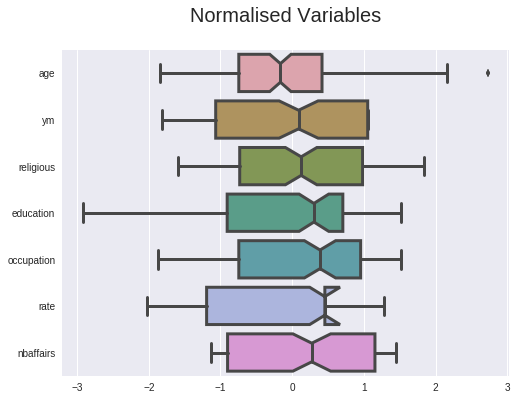

In [22]:
affairsnorm = (affairsdrop - affairsdrop.mean()) / affairsdrop.std()

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(data=affairsnorm, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, whis=1.5, ax=ax)

ax.set_title('Normalised Variables\n', fontsize=20)

plt.show()

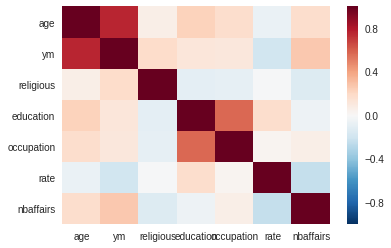

In [25]:
sns.heatmap(affairsdrop.corr())